# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

C:\Users\Admin'\AppData\Local\Temp\ipykernel_33944\3107362156.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


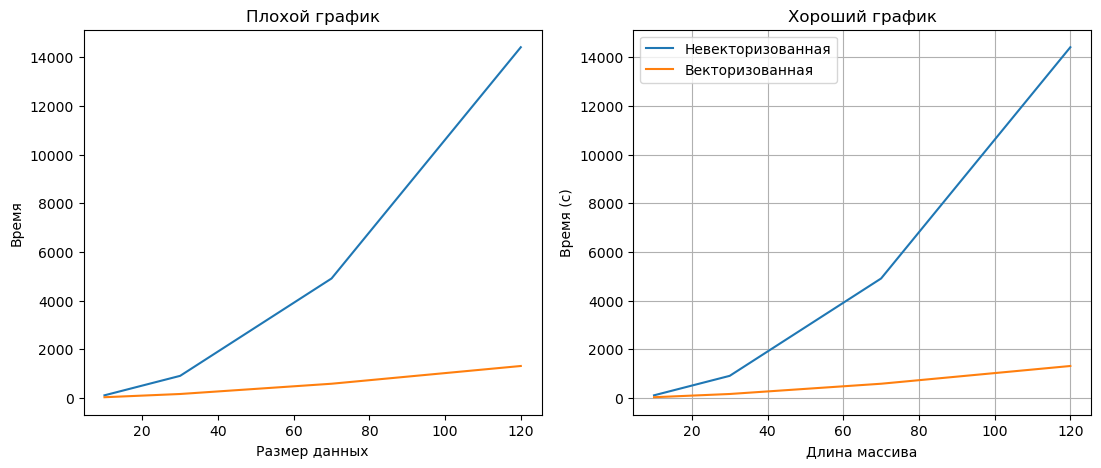

In [20]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

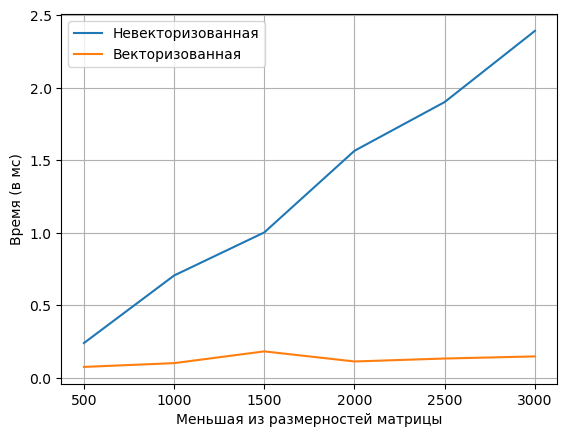

In [132]:
import time
from random import randint
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def prod_non_zero_diag_non_vec(x):
    ans = 1
    for i in range(min(len(x), len(x[0]))):
        if x[i][i] != 0:
            ans *= x[i][i]
    return ans

def prod_non_zero_diag_vec(x):
    x2 = x.diagonal()
    x2 = x2[x2 != 0]
    ans = x2.prod()
    return ans


maxsz = 3000
cnt = 3
data_size = []
time_non_vectorized = []
time_vectorized = []

for sz in range(500, maxsz + 1, 500):
    sum_time_non_vec = 0
    sum_time_vec = 0
    for _ in range(cnt):
        n = sz
        m = randint(sz, maxsz + 1)
        if randint(0, 2) == 1:
            n, m = m, n
        
        x = [[randint(-100, 100) for j in range(m)] for i in range(n)]
        
        start = time.perf_counter()
        ans = prod_non_zero_diag_non_vec(x)
        finish = time.perf_counter()
        sum_time_non_vec += (finish - start) * 1000
        
        x = np.array(x)
        
        start = time.perf_counter()
        ans = prod_non_zero_diag_vec(x)
        finish = time.perf_counter()
        sum_time_vec += (finish - start) * 1000
        
    data_size.append(sz)
    time_non_vectorized.append(sum_time_non_vec / cnt)
    time_vectorized.append(sum_time_vec / cnt)
    
plt.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
plt.plot(data_size, time_vectorized, label=u"Векторизованная")
plt.xlabel(u"Меньшая из размерностей матрицы")
plt.ylabel(u"Время (в мс)")
plt.grid()
plt.legend()

# 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


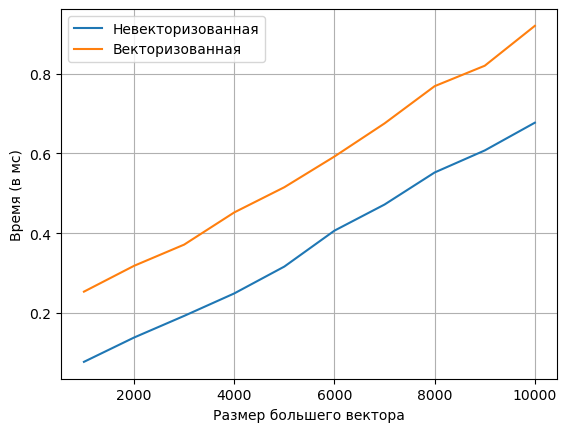

In [136]:
import time
from random import randint
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def are_multisets_equal_non_vec(x, y):
    x2 = set(x)
    y2 = set(y)
    return x2 == y2

def are_multisets_equal_vec(x, y):
    x2 = np.unique(x)
    y2 = np.unique(y)
    return len(np.setxor1d(x2, y2)) == 0

maxsz = 10000
cnt = 70
data_size = []
time_non_vectorized = []
time_vectorized = []

for sz in range(1000, maxsz + 1, 1000):
    sum_time_non_vec = 0
    sum_time_vec = 0
    for _ in range(cnt):
        n = sz
        m = randint(1, sz + 1)
        
        x = [randint(-100, 100) for i in range(n)]
        y= [randint(-100, 100) for i in range(m)]
        
        start = time.perf_counter()
        ans = are_multisets_equal_non_vec(x, y)
        finish = time.perf_counter()
        sum_time_non_vec += (finish - start) * 1000
        
        x = np.array(x)
        y = np.array(y)
        
        start = time.perf_counter()
        ans = are_multisets_equal_vec(x, y)
        finish = time.perf_counter()
        sum_time_vec += (finish - start) * 1000
        
    data_size.append(sz)
    time_non_vectorized.append(sum_time_non_vec / cnt)
    time_vectorized.append(sum_time_vec / cnt)
    
plt.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
plt.plot(data_size, time_vectorized, label=u"Векторизованная")
plt.xlabel(u"Размер большего вектора")
plt.ylabel(u"Время (в мс)")
plt.grid()
plt.legend()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

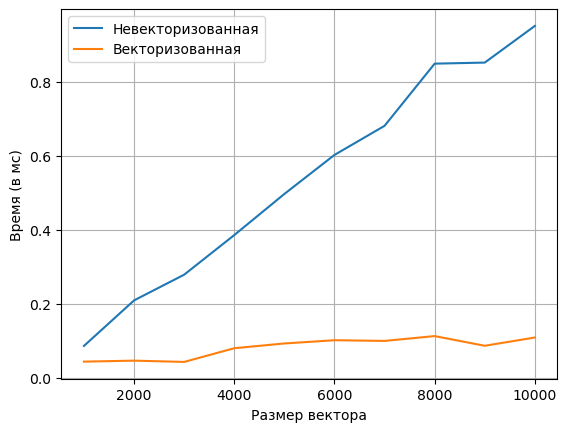

In [107]:
import time
from random import randint
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def max_after_zero_non_vec(x):
    ans = -1e18
    for i in range(1, len(x)):
        if x[i - 1] == 0:
            ans = max(ans, x[i])
    return ans

def max_after_zero_vec(x):
    y = np.arange(0, len(x), 1)
    y = y[x[y] == 0]
    y = y[y < len(x) - 1]
    y += 1
    y = x[y]
    ans = -1e18
    if len(y) > 0:
        ans = y.max()
    return ans

maxsz = 10000
cnt = 70
data_size = []
time_non_vectorized = []
time_vectorized = []

for sz in range(1000, maxsz + 1, 1000):
    sum_time_non_vec = 0
    sum_time_vec = 0
    for _ in range(cnt):
        n = sz
        x = [randint(-100, 100) for i in range(n)]
        
        start = time.perf_counter()
        ans = max_after_zero_non_vec(x)
        finish = time.perf_counter()
        sum_time_non_vec += (finish - start) * 1000
        
        x = np.array(x)
        
        start = time.perf_counter()
        ans = ans = max_after_zero_vec(x)
        finish = time.perf_counter()
        sum_time_vec += (finish - start) * 1000
        
    data_size.append(sz)
    time_non_vectorized.append(sum_time_non_vec / cnt)
    time_vectorized.append(sum_time_vec / cnt)
    
plt.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
plt.plot(data_size, time_vectorized, label=u"Векторизованная")
plt.xlabel(u"Размер вектора")
plt.ylabel(u"Время (в мс)")
plt.grid()
plt.legend()

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


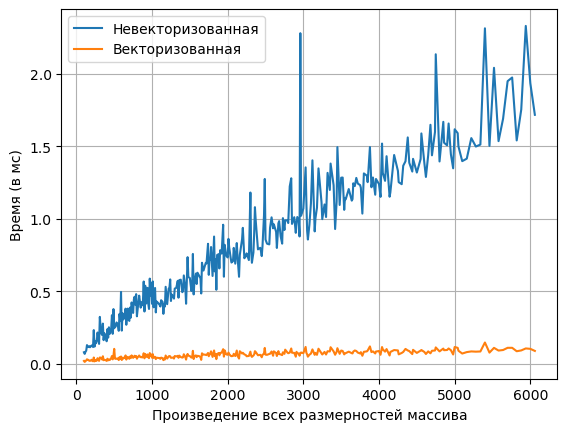

In [134]:
import time
from random import randint
from random import random
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def convert_image_non_vec(img, coefs):
    img2 = [[0] * len(img[0]) for _ in range(len(img))]
    for i in range(len(img)):
        for j in range(len(img[i])):
            for k in range(len(coefs)):
                img2[i][j] += coefs[k] * img[i][j][k]
    return img2

def convert_image_vec(img, coefs):
    img = np.dot(img, coefs)
    return img

maxsz = 10
cnt = 10
data_sum_non_vectorized = [0] * 10000
data_sum_vectorized = [0] * 10000
data_cnt = [0] * 10000
data_size = []
time_non_vectorized = []
time_vectorized = []

for _ in range(3000):
    height = randint(10, 101)
    weight = randint(10, 101)
    numChannels = randint(1, 6)
    
    for __ in range(cnt):
        time_non_vec = 0
        time_vec = 0
        img = [[[randint(0, 256) for k in range(numChannels)] for j in range(height)] for i in range(width)]
        coefs = [random() for i in range(numChannels)]
        
        start = time.perf_counter()
        img2 = convert_image_non_vec(img, coefs)
        finish = time.perf_counter()
        time_non_vec += (finish - start) * 1000
        
        img = np.array(img)
        coefs = np.array(coefs)
        
        start = time.perf_counter()
        img2 = convert_image_vec(img, coefs)
        finish = time.perf_counter()
        time_vec += (finish - start) * 1000
                
        sz = height * width * numChannels
        data_sum_non_vectorized[sz] += time_non_vec
        data_sum_vectorized[sz] += time_vec
        data_cnt[sz] += 1
    
            
for sz in range(1, 10000):
    if (data_cnt[sz] > 0):
        data_size.append(sz)
        time_non_vectorized.append(data_sum_non_vectorized[sz] / data_cnt[sz])
        time_vectorized.append(data_sum_vectorized[sz] / data_cnt[sz])
    
plt.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
plt.plot(data_size, time_vectorized, label=u"Векторизованная")
plt.xlabel(u"Произведение всех размерностей массива")
plt.ylabel(u"Время (в мс)")
plt.grid()
plt.legend()

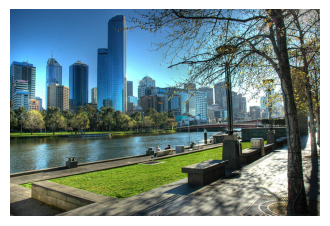

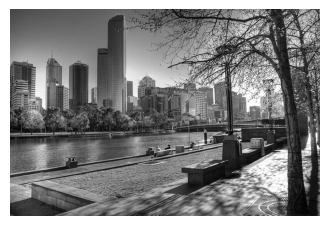

In [115]:
import imageio
from PIL import Image

def convert_image(img, coefs):
    img = np.dot(img, coefs)
    return img

Im = Image.open("City.jpg")
img = np.array(Im)
pilimage = Image.fromarray(img)
plt.figure(figsize=(4,4))
plt.imshow(pilimage) 
plt.axis('off')
plt.show()


coefs = np.array([0.299, 0.587, 0.114])
img = convert_image(img, coefs)
pilimage = Image.fromarray(np.array(img))
plt.figure(figsize=(4,4))
plt.imshow(pilimage) 
plt.axis('off')
plt.show()

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

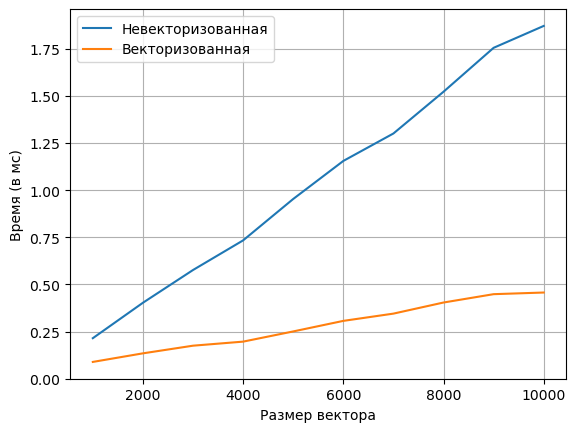

In [117]:
import time
from random import randint
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def run_length_encoding_non_vec(x):
    cnt_num = dict()
    for el in x:
        cnt_num[el] = 0
    for el in x:
        cnt_num[el] += 1
    ans1, ans2 = [], []
    for el in cnt_num:
        ans1.append(el)
        ans2.append(cnt_num[el])
    return [ans1, ans2]   

def run_length_encoding_vec(x):
    ans = np.unique(x, return_counts=True)
    return ans

maxsz = 10000
cnt = 70
data_size = []
time_non_vectorized = []
time_vectorized = []

for sz in range(1000, maxsz + 1, 1000):
    sum_time_non_vec = 0
    sum_time_vec = 0
    for _ in range(cnt):
        n = sz
        x = [randint(-100, 100) for i in range(n)]
        
        start = time.perf_counter()
        ans = run_length_encoding_non_vec(x)
        finish = time.perf_counter()
        sum_time_non_vec += (finish - start) * 1000
        
        x = np.array(x)
        
        start = time.perf_counter()
        ans = run_length_encoding_vec(x)
        finish = time.perf_counter()
        sum_time_vec += (finish - start) * 1000
        
    data_size.append(sz)
    time_non_vectorized.append(sum_time_non_vec / cnt)
    time_vectorized.append(sum_time_vec / cnt)
    
plt.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
plt.plot(data_size, time_vectorized, label=u"Векторизованная")
plt.xlabel(u"Размер вектора")
plt.ylabel(u"Время (в мс)")
plt.grid()
plt.legend()

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

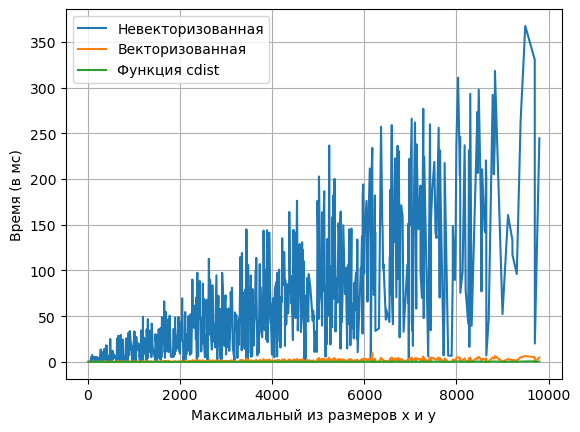

In [128]:
from random import randint
from random import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

%matplotlib inline

def pairwise_distance_non_vec(x, y):
    n = len(x)
    m = len(y)
    ans = [[0] * m for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for k in range(len(x[i])):
                ans[i][j] += (x[i][k] - y[j][k]) ** 2
            ans[i][j] = ans[i][j] ** 0.5
    return ans

def pairwise_distance_vec(x, y):
    # x[:, np.newaxis] -> добавляет новую размерность
    return np.sqrt(np.sum((x[:, np.newaxis] - y) ** 2, axis = -1))

maxsz = 10
maxel = 1000
cnt = 5
data_sum_non_vectorized = [0] * 100000
data_sum_vectorized = [0] * 100000
data_sum_scipy = [0] * 100000
data_cnt = [0] * 100000
data_size = []
time_non_vectorized = []
time_vectorized = []
time_scipy = []

for _ in range(1000):
    n = randint(1, 101)
    m = randint(1, 101)
    k = randint(1, 101)
    
    for __ in range(cnt):
        x = [[random() * maxel for j in range(k)] for i in range(n)]
        y = [[random() * maxel for j in range(k)] for i in range(m)]
        
        start = time.perf_counter()
        ans = pairwise_distance_non_vec(x, y)
        finish = time.perf_counter()
        time_non_vec = (finish - start) * 1000
        
        x = np.array(x)
        y = np.array(y)
        
        start = time.perf_counter()
        ans = pairwise_distance_vec(x, y)
        finish = time.perf_counter()
        time_vec = (finish - start) * 1000
    
        start = time.perf_counter()
        ans = cdist(x, y,'euclidean')
        finish = time.perf_counter()
        time_sc = (finish - start) * 1000
                
        sz = max(n, m) * k
        data_sum_non_vectorized[sz] += time_non_vec
        data_sum_vectorized[sz] += time_vec
        data_sum_scipy[sz] += time_sc
        data_cnt[sz] += 1
    
            
for sz in range(1, 10000):
    if (data_cnt[sz] > 0):
        data_size.append(sz)
        time_non_vectorized.append(data_sum_non_vectorized[sz] / data_cnt[sz])
        time_vectorized.append(data_sum_vectorized[sz] / data_cnt[sz])
        time_scipy.append(data_sum_scipy[sz] / data_cnt[sz])
    
plt.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
plt.plot(data_size, time_vectorized, label=u"Векторизованная")
plt.plot(data_size, time_scipy, label=u"Функция cdist")
plt.xlabel(u"Максимальный из размеров x и y")
plt.ylabel(u"Время (в мс)")
plt.grid()
plt.legend()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

## В этой работе я узнала:
* Как строить графики в _Python_
************************************
* Как пользоваться **numpy-массивами**
*************************************
* Как менять изображения с помощью _Python_
*************************************
* Как пользоваться Markdown в _Jupyter notebook_
